<a href="https://colab.research.google.com/github/JarnovdKolk/Test/blob/main/Hands-on2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import re
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io
import pandas as pd
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d


In [ ]:
pip install xgboost --user

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

In [4]:
# Create the 'data' directory if it doesn't exist
!mkdir -p data

# Download the file using wget
!wget https://raw.githubusercontent.com/k-woodruff/bdt-tutorial/master/data/training_10k.csv -O data/training_10k.csv
data = pd.read_csv("data/training_10k.csv")

--2025-02-11 09:43:06--  https://raw.githubusercontent.com/k-woodruff/bdt-tutorial/master/data/training_10k.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2210243 (2.1M) [text/plain]
Saving to: ‘data/training_10k.csv’

data/training_10k.c 100%[===================>]   2.11M  --.-KB/s    in 0.07s   

2025-02-11 09:43:07 (28.7 MB/s) - ‘data/training_10k.csv’ saved [2210243/2210243]



In [5]:
print("Size of data: {}".format(data.shape))
print("Number of events: {}".format(data.shape[0]))
print("Number of columns: {}".format(data.shape[1]))

print("\nList of features in dataset:")
for col in data.columns:
    print(col)



Size of data: (10000, 33)
Number of events: 10000
Number of columns: 33

List of features in dataset:
EventId
DER_mass_MMC
DER_mass_transverse_met_lep
DER_mass_vis
DER_pt_h
DER_deltaeta_jet_jet
DER_mass_jet_jet
DER_prodeta_jet_jet
DER_deltar_tau_lep
DER_pt_tot
DER_sum_pt
DER_pt_ratio_lep_tau
DER_met_phi_centrality
DER_lep_eta_centrality
PRI_tau_pt
PRI_tau_eta
PRI_tau_phi
PRI_lep_pt
PRI_lep_eta
PRI_lep_phi
PRI_met
PRI_met_phi
PRI_met_sumet
PRI_jet_num
PRI_jet_leading_pt
PRI_jet_leading_eta
PRI_jet_leading_phi
PRI_jet_subleading_pt
PRI_jet_subleading_eta
PRI_jet_subleading_phi
PRI_jet_all_pt
Weight
Label


Number of signal events: 3372
Number of background events: 6628
Fraction signal: 0.3372


<Figure size 640x480 with 0 Axes>

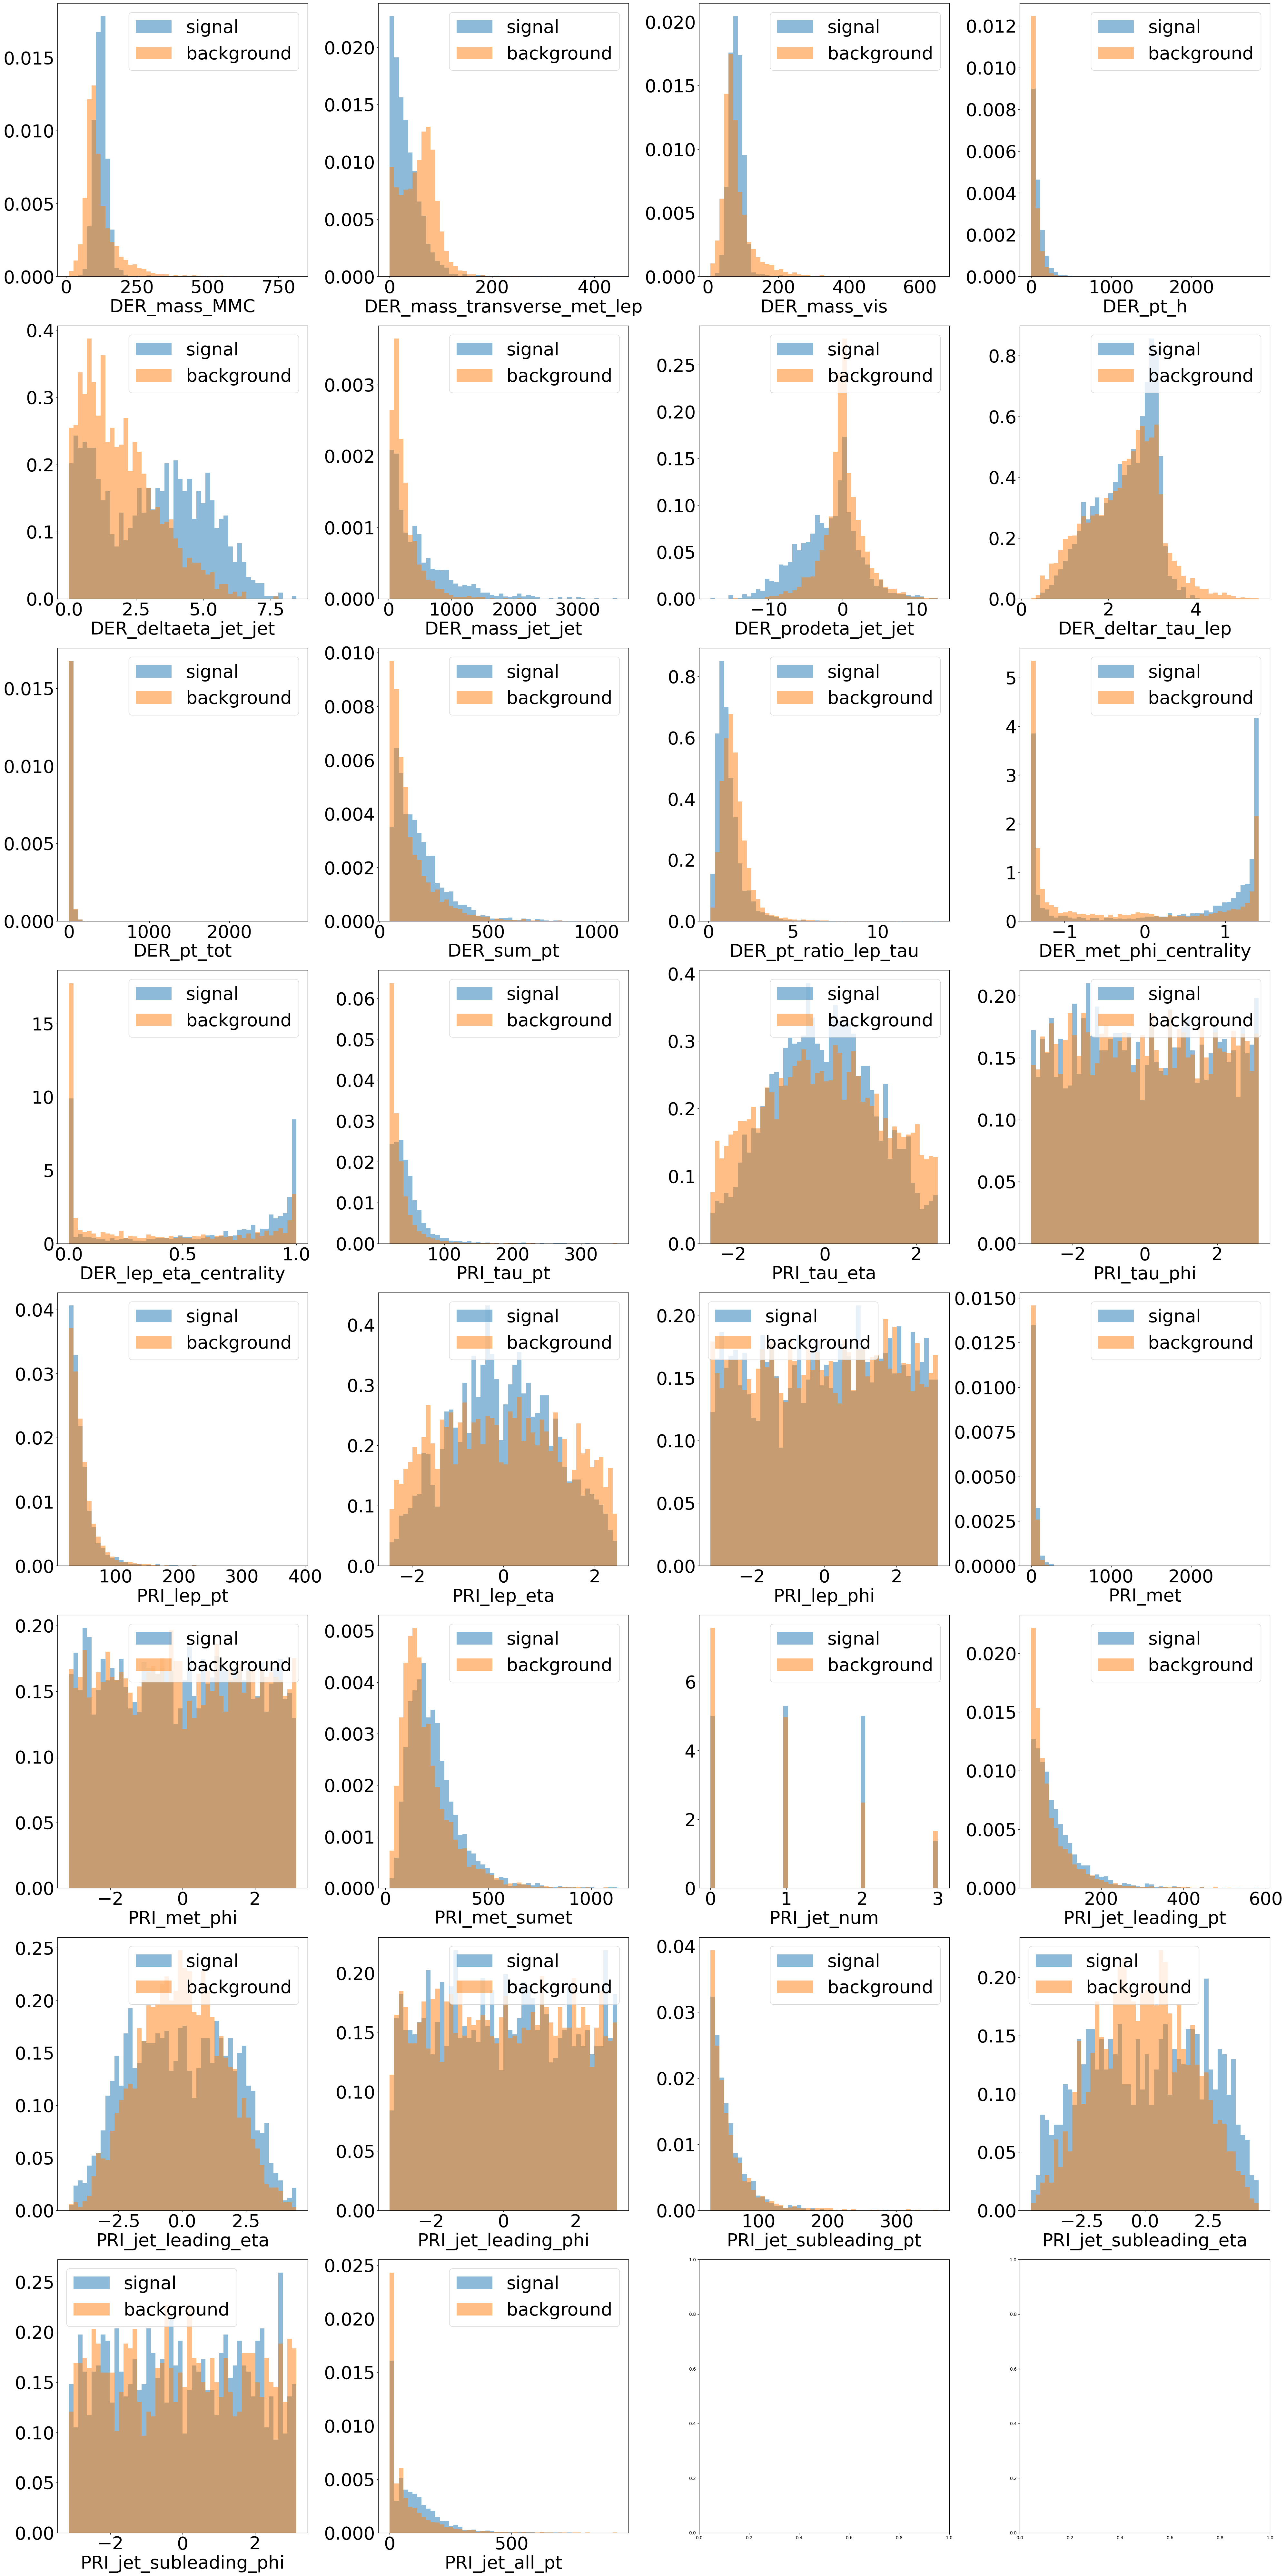

In [7]:
# look at column labels --- notice last one is "Label" and first is "EventId" also "Weight"
print(f"Number of signal events: {len(data[data.Label == 's'])}")
print(f"Number of background events: {len(data[data.Label == 'b'])}")
print(f"Fraction signal: {len(data[data.Label == 's'])/(len(data[data.Label == 's']) + len(data[data.Label == 'b']))}")

plt.figure()


fig, axs = plt.subplots(8, 4, figsize=(40, 80))

for ix, ax in enumerate(axs.reshape(-1)):
    col = data.columns[ix + 1]
    if col == "Weight" or col == "Label":
        continue
    signal = data[col][data.Label == "s"].to_numpy()
    mask_signal = signal > -999
    background = data[col][data.Label == "b"].to_numpy()
    mask_background = background > -999
    xmin = min(np.min(background[mask_background]), np.min(signal[mask_signal]))
    xmax = max(np.max(background[mask_background]), np.max(signal[mask_signal]))

    ax.hist(signal[mask_signal], bins=np.linspace(xmin, xmax, 51), alpha=0.5, label="signal", density=True)
    ax.hist(background[mask_background], bins=np.linspace(xmin, xmax, 51), alpha=0.5, label="background", density=True)

    ax.set_xlabel(col, fontsize=40)
    ax.set_xlabel(col, fontsize=40)
    ax.tick_params(axis="both", which="major", labelsize=40)
    ax.legend(fontsize=40)
plt.tight_layout()
plt.show()